# Power Consumption Study

## Problem Statement 

Typically a house in Manhattan comprises of various electrical appliances. Each of these appliances partly contributes to the total energy consumption of the house. If these houses are grouped based on their power usage, it helps to analyze the requirement of electric power in different parts of the city. Also, the insights can be useful to identify the appliances with high and low usage of electricity. In this case study, we consider the power consumption due to various appliances in the house and try to group the houses as per their power consumption.

##  Data Definition 

The dataset represents the electric power consumption in the house. The data definition is as follows:

**Global_active_power**: The global minute-averaged active power of the house (in KW)

**Global_reactive_power**: The global minute-averaged reactive power of the house (in KW)

**Voltage**: The minute-averaged voltage of the house (in volt)

**Global_intensity**: The global minute-averaged current intensity of the house (in ampere)

**Kitchen_consumption**: The power consumption of the appliances in the kitchen (in watt-hour)

**Laundry_consumption**: The power consumption of the appliances in the laundry room (in watt-hour)

**Other_appliances_consumption**: The power consumption of the appliances other than in the kitchen and laundry room (in watt-hour)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('power.xlsx')

In [3]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17
2,3.212,0.304,235.99,14.2,1,26,17
3,3.694,0.280,235.16,15.6,1,35,17
4,3.204,0.292,236.08,14.0,1,27,17


In [4]:
data.shape

(21240, 7)

In [5]:
data.isnull().sum()

Global_active_power             0
Global_reactive_power           0
Voltage                         0
Global_intensity                0
Kitchen_consumption             0
Laundry_consumption             0
Other_appliances_consumption    0
dtype: int64

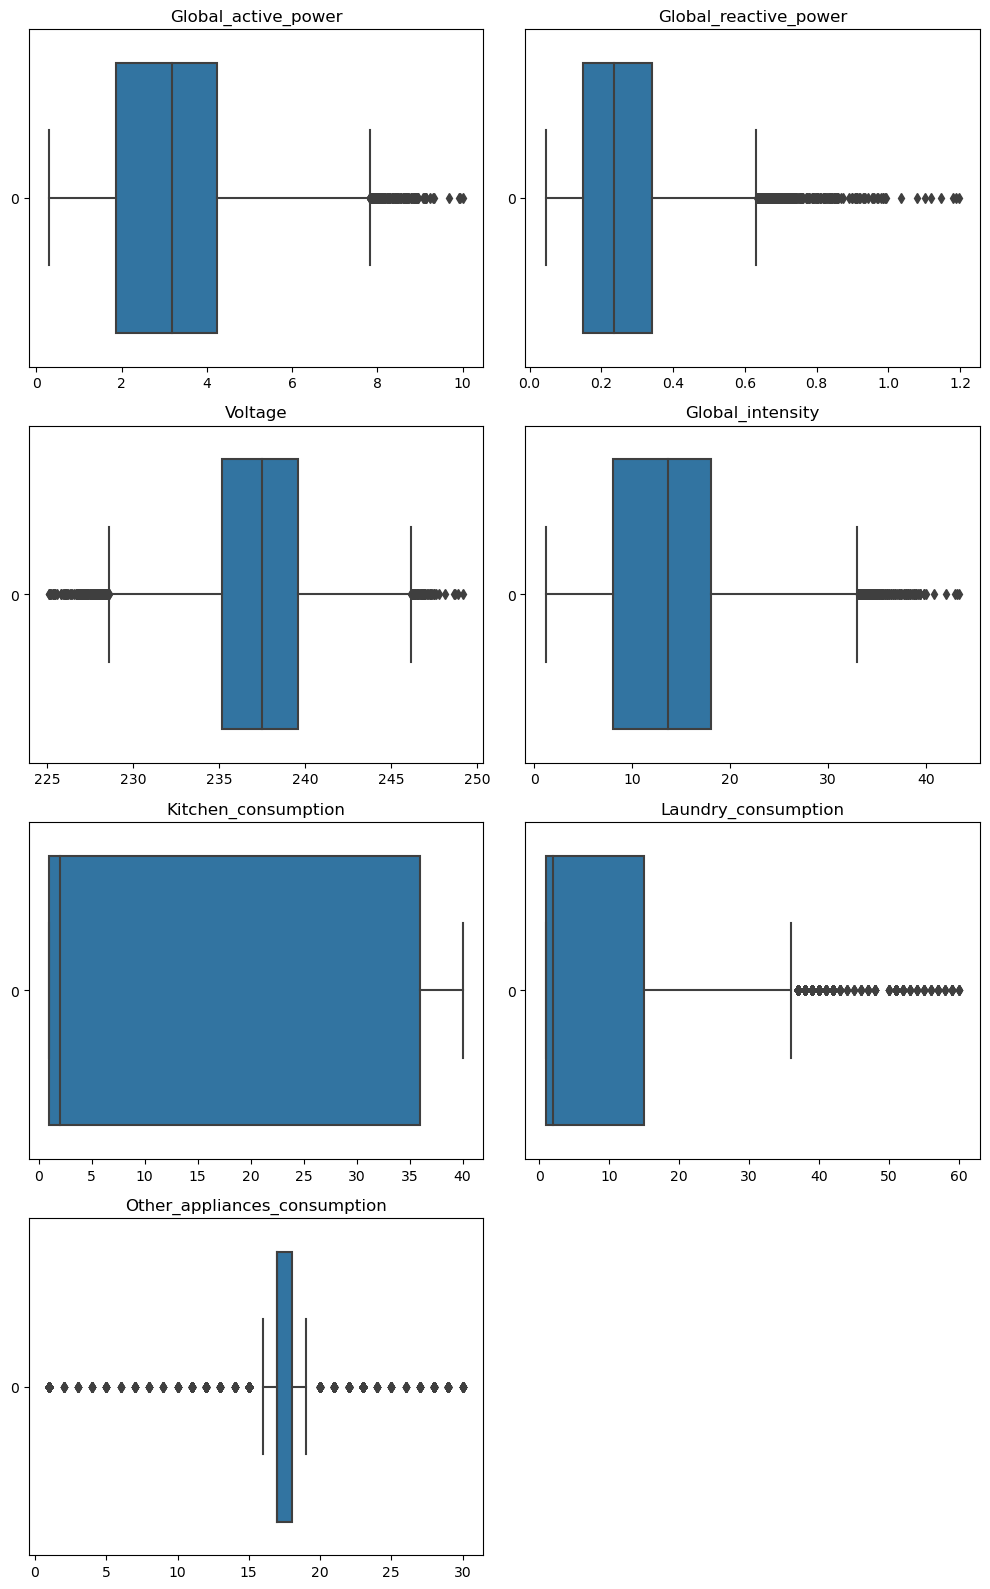

In [6]:
t=1
plt.figure(figsize = (10,16))
for i in data.columns:
    plt.subplot(4,2,t)
    sns.boxplot(data[i],orient = 'h')
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

## Lets first reduce the dimension of data for better visualization and clustering

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
sc = StandardScaler()

df_s = sc.fit_transform(data)

In [9]:
df_s = pd.DataFrame(df_s, columns = data.columns)

In [10]:
df_s

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,-0.645095,-0.673126,0.001465,-0.576969,-0.754271,-0.165925,0.083161
1,0.260541,0.252945,-0.636716,0.255308,-0.693563,1.883736,0.083161
2,-0.048310,0.308233,-0.390812,0.025714,-0.754271,1.224917,0.083161
3,0.248236,0.142369,-0.633789,0.226609,-0.754271,1.883736,0.083161
4,-0.053232,0.225301,-0.364465,-0.002985,-0.754271,1.298119,0.083161
...,...,...,...,...,...,...,...
21235,-0.294407,0.211479,0.504984,-0.318676,-0.693563,-0.531936,0.083161
21236,-0.327630,0.211479,0.376177,-0.347375,-0.754271,-0.605138,0.323773
21237,-0.332552,0.183835,0.218095,-0.347375,-0.693563,-0.605138,0.083161
21238,-0.229192,0.059438,-0.065866,-0.232578,-0.754271,-0.605138,0.323773


In [11]:
pca = PCA(n_components=7)

In [12]:
pca.fit(df_s)

PCA(n_components=7)

In [13]:
pca.explained_variance_

array([3.15319220e+00, 1.14222068e+00, 9.77924419e-01, 9.06554619e-01,
       6.52376369e-01, 1.67381381e-01, 6.79911460e-04])

In [14]:
pca.explained_variance_ratio_

array([4.50434821e-01, 1.63166701e-01, 1.39696911e-01, 1.29501705e-01,
       9.31922364e-02, 2.39105001e-02, 9.71256356e-05])

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.45043482, 0.61360152, 0.75329843, 0.88280014, 0.97599237,
       0.99990287, 1.        ])

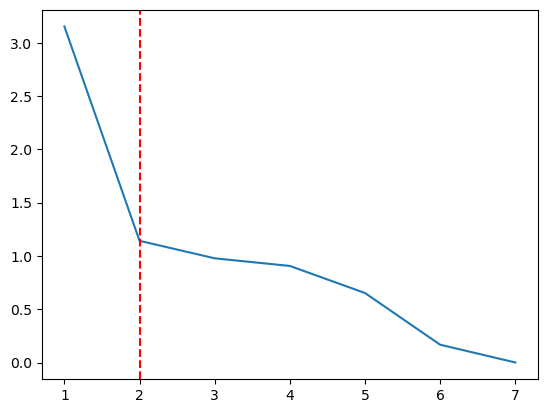

In [16]:
#scree plot
plt.plot(pca.explained_variance_)
plt.xticks(range(0,7),range(1,8))
plt.axvline(x=1,color = 'red', ls = '--')
plt.show()

In [17]:
##kesiar criterion

In [18]:
pca.explained_variance_[pca.explained_variance_>=1]

array([3.1531922 , 1.14222068])

In [19]:
np.set_printoptions(suppress=True)

In [20]:
pca = PCA(n_components=2)

In [21]:
data_pca = pd.DataFrame(pca.fit_transform(df_s), columns= ['PCA1','PCA2'])

In [22]:
data_pca

,PCA1,PCA2
0,-1.067477,-0.532983
1,0.922166,-1.236260
2,0.295110,-0.864841
3,0.866390,-1.313918
4,0.284213,-0.939421
...,...,...
21235,-0.946356,0.038911
21236,-0.995878,-0.071815
21237,-0.902515,0.075620
21238,-0.727290,-0.150238


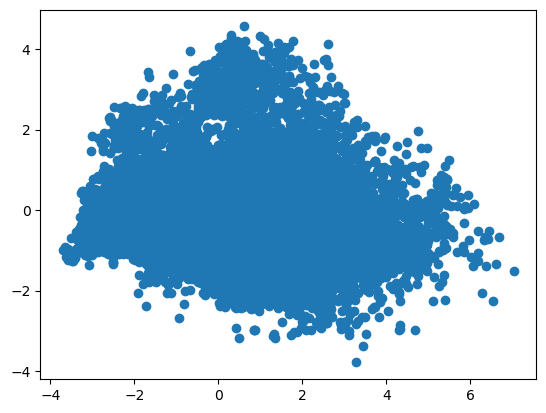

In [23]:
plt.scatter(x=data_pca['PCA1'],y=data_pca['PCA2'])

In [24]:
np.sum(pca.explained_variance_ratio_)

0.6136015213883828

## Lets try K-means clustering of the PCA data

In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score

In [26]:
k_elbow = KElbowVisualizer(KMeans(),k=8)

C:\Users\Anmol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anmol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anmol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anmol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anmol\anaconda3\lib\site-packages\sklearn\clust

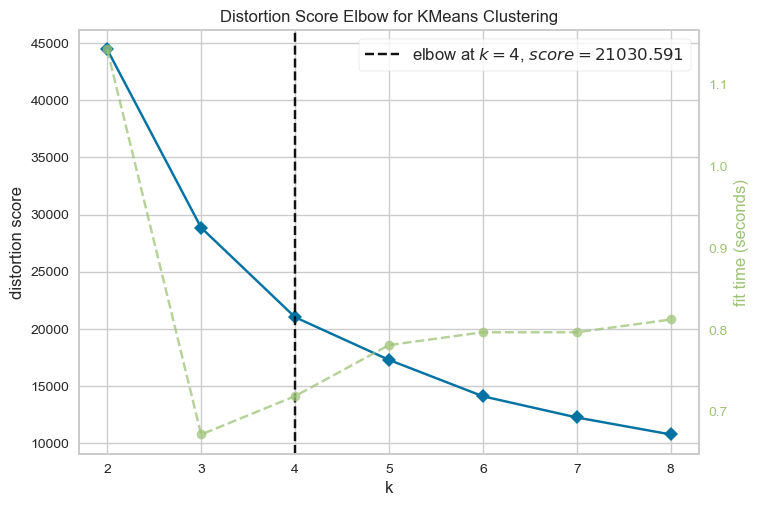

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
k_elbow.fit(data_pca)
k_elbow.show()

In [28]:
##silhotte visualizer

C:\Users\Anmol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anmol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anmol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anmol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anmol\anaconda3\lib\site-packages\sklearn\clust

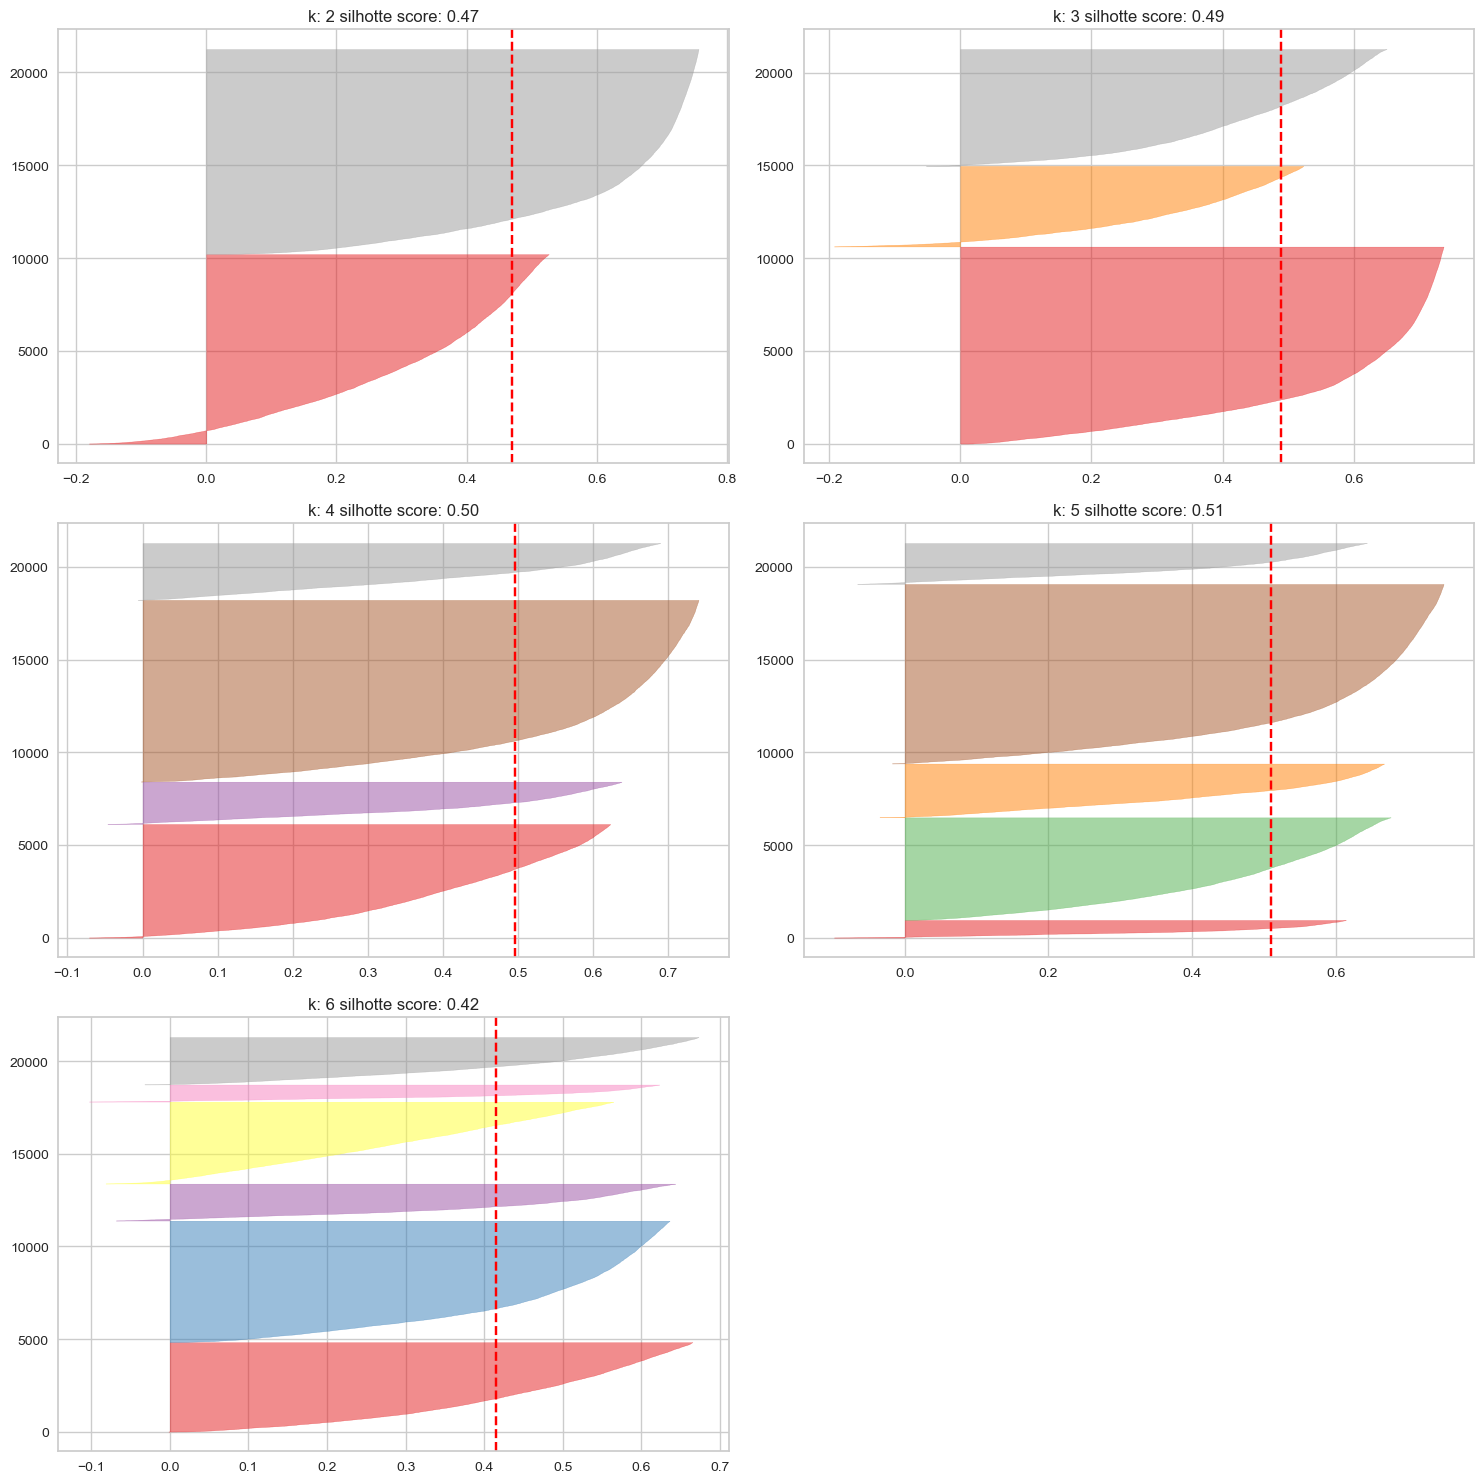

In [29]:
t=1
plt.figure(figsize=(15,15))
for i in range(2,7):
    plt.subplot(3,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    plt.title('k: %d silhotte score: %.2f'%(i,sil_viz.silhouette_score_))
    t+=1
plt.tight_layout()
plt.show()

In [30]:
#lets go with k=4

In [31]:
model_kmean = KMeans(n_clusters=4)

In [32]:
y_pred_kmeans = model_kmean.fit_predict(data_pca)

C:\Users\Anmol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
centroids = model_kmean.cluster_centers_

In [34]:
centroids

array([[ 0.91275658,  1.08058105],
       [-1.57351625, -0.11249284],
       [ 3.36150032, -0.63307816],
       [ 0.71954461, -1.33401726]])

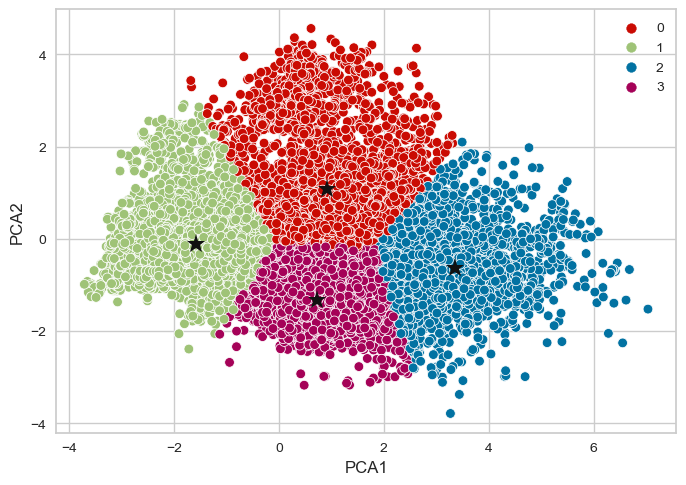

In [35]:
sns.scatterplot(x=data_pca['PCA1'],y=data_pca['PCA2'],hue = y_pred_kmeans, palette= ['r','g','b','m'])
for i in range(4):
    plt.plot(centroids[i][0],centroids[i][1],marker = '*',ms =14,color ='k')
plt.show()

## Inference



In [36]:
data['Kmeans_label'] = y_pred_kmeans

In [37]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label
0,2.242,0.162,237.33,10.0,1,7,17,1
1,3.714,0.296,235.15,15.8,2,35,17,3
2,3.212,0.304,235.99,14.2,1,26,17,3
3,3.694,0.280,235.16,15.6,1,35,17,3
4,3.204,0.292,236.08,14.0,1,27,17,3
...,...,...,...,...,...,...,...,...
21235,2.812,0.290,239.05,11.8,2,2,17,1
21236,2.758,0.290,238.61,11.6,1,1,18,1
21237,2.750,0.286,238.07,11.6,2,1,17,1
21238,2.918,0.268,237.10,12.4,1,1,18,1


In [38]:
data['Kmeans_label'].value_counts()

1    9790
0    6120
3    3056
2    2274
Name: Kmeans_label, dtype: int64

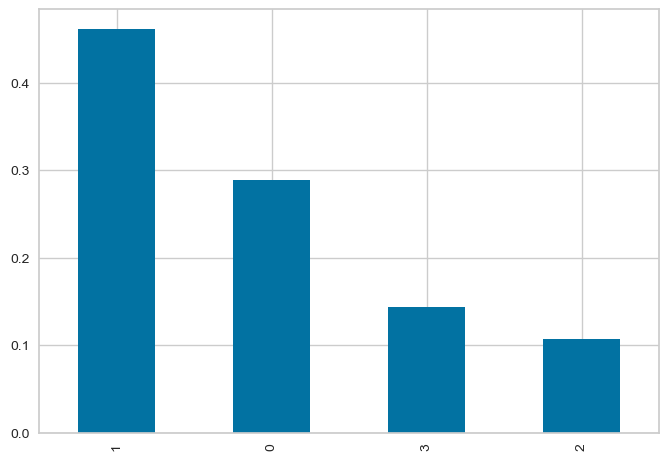

In [39]:
data['Kmeans_label'].value_counts(normalize= True).plot(kind = 'bar')
plt.show()

In [40]:
data.groupby(by = 'Kmeans_label').mean().T

Kmeans_label,0,1,2,3
Global_active_power,3.982620,1.921779,6.351378,4.011720
Global_reactive_power,0.304053,0.242479,0.277815,0.210478
Voltage,236.277083,239.065753,233.437986,236.739359
Global_intensity,16.969608,8.148417,27.280827,17.060929
Kitchen_consumption,32.183660,1.762921,27.598505,2.668521
Laundry_consumption,3.473856,2.125026,30.973615,27.593586
Other_appliances_consumption,14.735294,17.554137,16.732630,17.556937


In [41]:
np.mean(data,axis =1)

0        34.46675
1        38.99500
2        37.58825
3        38.84175
4        37.69700
           ...   
21235    34.49400
21236    34.28225
21237    34.21325
21238    34.21075
21239    34.00750
Length: 21240, dtype: float64

In [42]:
data['overall_consumption'] = np.mean(data[['Kitchen_consumption','Laundry_consumption','Other_appliances_consumption']],axis = 1)

In [43]:
data.groupby(by = 'Kmeans_label').mean().T

Kmeans_label,0,1,2,3
Global_active_power,3.982620,1.921779,6.351378,4.011720
Global_reactive_power,0.304053,0.242479,0.277815,0.210478
Voltage,236.277083,239.065753,233.437986,236.739359
Global_intensity,16.969608,8.148417,27.280827,17.060929
Kitchen_consumption,32.183660,1.762921,27.598505,2.668521
Laundry_consumption,3.473856,2.125026,30.973615,27.593586
Other_appliances_consumption,14.735294,17.554137,16.732630,17.556937
overall_consumption,16.797603,7.147361,25.101583,15.939682


In [44]:
np.mean(data[['Kitchen_consumption','Laundry_consumption','Other_appliances_consumption']])

C:\Users\Anmol\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Kitchen_consumption             13.424529
Laundry_consumption              9.266667
Other_appliances_consumption    16.654379
dtype: float64

In [45]:
#data.drop('overall_consumption',axis = 1,inplace= True)

On the basis of overall consumption

label 2 - > very high
label 1 -> high
label 3 = low
label 0 = very low

In [46]:
category = {2:'very high',1:'high',3:'Low',0:'very Low'}

In [47]:
data['Kmeans_label'] = data['Kmeans_label'].map(category)

In [48]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label,overall_consumption
0,2.242,0.162,237.33,10.0,1,7,17,high,8.333333
1,3.714,0.296,235.15,15.8,2,35,17,Low,18.000000
2,3.212,0.304,235.99,14.2,1,26,17,Low,14.666667
3,3.694,0.280,235.16,15.6,1,35,17,Low,17.666667
4,3.204,0.292,236.08,14.0,1,27,17,Low,15.000000
...,...,...,...,...,...,...,...,...,...
21235,2.812,0.290,239.05,11.8,2,2,17,high,7.000000
21236,2.758,0.290,238.61,11.6,1,1,18,high,6.666667
21237,2.750,0.286,238.07,11.6,2,1,17,high,6.666667
21238,2.918,0.268,237.10,12.4,1,1,18,high,6.666667


In [49]:
data.rename(columns={'Kmeans_label':'Consumption_category'},inplace=True)

In [50]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Consumption_category,overall_consumption
0,2.242,0.162,237.33,10.0,1,7,17,high,8.333333
1,3.714,0.296,235.15,15.8,2,35,17,Low,18.000000
2,3.212,0.304,235.99,14.2,1,26,17,Low,14.666667
3,3.694,0.280,235.16,15.6,1,35,17,Low,17.666667
4,3.204,0.292,236.08,14.0,1,27,17,Low,15.000000
...,...,...,...,...,...,...,...,...,...
21235,2.812,0.290,239.05,11.8,2,2,17,high,7.000000
21236,2.758,0.290,238.61,11.6,1,1,18,high,6.666667
21237,2.750,0.286,238.07,11.6,2,1,17,high,6.666667
21238,2.918,0.268,237.10,12.4,1,1,18,high,6.666667
